In [83]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
# https://doc.pysim.org/


In [4]:
filename = r'C:\Users\GLai\OneDrive - California Department of Toxic Substances Control\Documents\SCP marketecon research\PFAS Treatment priority product regulation\Price simulation\2.1 Select set of treatment products to purchase.xlsx'
dataframe = pd.read_excel(filename, sheet_name= 'Option 1')
list(dataframe)

['Clearya ID',
 'Source',
 'test',
 'Company',
 'Product',
 'AA List Duplicate?',
 'Clearya Duplicate?',
 'Purchase?',
 'Web Link',
 'UPC',
 'Product Subcategory',
 'Retailer (if cannot purchase from mfr./brand)',
 'Retailer Web Link (if cannot purchase from mfr./brand)',
 'Professional use product',
 'Price',
 'Country of Origin',
 'Professional use or service-based product and cannot buy',
 'Cannot be shipped to California',
 'Currently unavailable',
 'Not in scope',
 'QC',
 'CalSAFER Info',
 'Notes',
 'Category on retailer website',
 'Package photo URL',
 'Label photo URL',
 'Ingredient list from label photo\n(PFAS related highlighted)',
 '`',
 'SDS URL',
 'Product Overview']

In [5]:
dataframe['index'] = dataframe.index

purchase_dataframe = dataframe.loc[dataframe['Purchase?'] == 'x']
purchase_dataframe = purchase_dataframe.loc[purchase_dataframe['Clearya Duplicate?'] != 'x']
purchase_dataframe = purchase_dataframe.loc[purchase_dataframe['Professional use or service-based product and cannot buy'] != 'x']
purchase_dataframe = purchase_dataframe.loc[purchase_dataframe['Cannot be shipped to California'] != 'x']
purchase_dataframe = purchase_dataframe.loc[purchase_dataframe['Currently unavailable'] != 'x']
purchase_dataframe = purchase_dataframe.loc[purchase_dataframe['Not in scope'] != 'x']


In [6]:
purchase_dataframe = purchase_dataframe[['index', 'Company', 'Product', 'Price']]
purchase_dataframe.head(25)

,index,Company,Product,Price
4,4,3D,"3D LVP Interior Cleaner - Removes Dirt, Grime,...",15.99
9,9,3M,Scotchgard Auto Fabric & Carpet Water Shield,18.70
10,10,3M,Scotchgard Extraction Cleaner Concentrate 27,47.57
11,11,3M,Scotchgard Rug & Carpet Protector,7.66
12,12,3M,Scotchgard Pretreatment Cleaner Concentrate 28,85.57
13,13,3M,Scotchgard Spot Remover and Upholstery Cleaner,16.99
14,14,3M,Scotchgard Fabric Water Shield,13.28
15,15,3M,Scotchgard Outdoor Water Shield,14.58
16,16,3M,Scotchgard Fabric Crafts Water Shield,10.00
17,17,3M,Scotchgard Sun & Water Shield,9.98


In [7]:
purchase_dataframe['Company'].nunique()
# There are 186 unique "Company", 
# "Company" in this context is based on Name of the column 'Company', 
# any variation of name, including typo or upper/lower case will count as a different entity.

186

In [8]:
product_per_company = purchase_dataframe.groupby('Company')['Product'].nunique()
product_per_company2 = purchase_dataframe.groupby('Company')['Price'].sum()

product_per_company = pd.merge(product_per_company, product_per_company2, on='Company')

In [9]:
list(product_per_company)

['Product', 'Price']

[Text(0.5, 1.0, "Density of Price \n (Higher means more products on x-axis' price range)")]

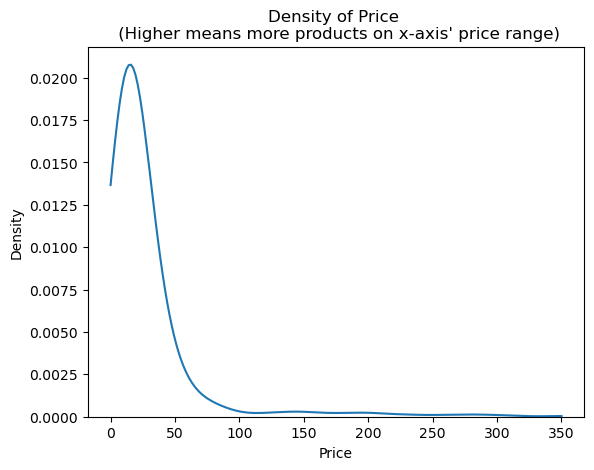

In [24]:
sns.kdeplot(data=purchase_dataframe, x='Price', clip=(0.0, 350)).set(title="Density of Price \n (Higher means more products on x-axis' price range)")


[Text(0.5, 1.0, 'Density of Product Per Company \n (Higher means more Companies carry number of products shown on x-axis)')]

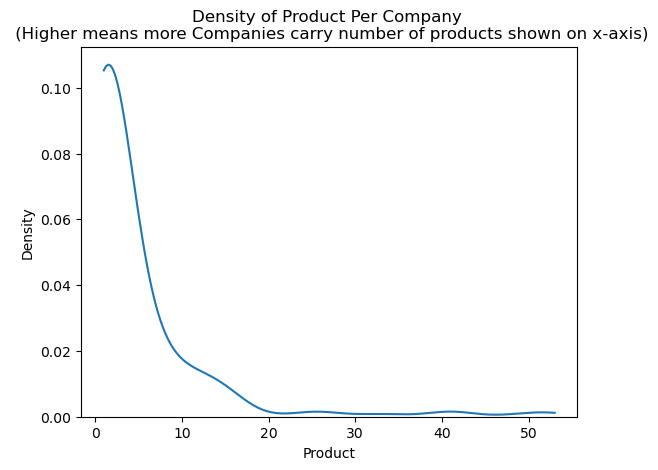

In [32]:
sns.kdeplot(data=product_per_company, x='Product', cut=0).set(title="Density of Product Per Company \n (Higher means more Companies carry number of products shown on x-axis)")

In [81]:
product_per_company.loc[product_per_company['Product'] == 3].count()

Product    8
Price      8
dtype: int64

In [29]:
product_per_company.loc[product_per_company['Product'] == 2].count()

Product    25
Price      25
dtype: int64

In [31]:
product_per_company.loc[product_per_company['Product'] == 1].count()

Product    100
Price      100
dtype: int64

In [30]:
product_per_company.count()

Product    186
Price      186
dtype: int64

In [80]:
purchase_dataframe.count()

index      845
Company    845
Product    845
Price      845
dtype: int64

In [116]:
#initialize empty list
n = 1
current_run = 0
overall_average = 0

cost_per_iteration = []
ave_per_iteration = []

ave_list_of_product = []
min_list_of_product = []
max_list_of_product =[]

# If we pick 1 product from each company
# there are 100 company that only carry 1 product, this will be our base case
#while (overall_average*.995 > current_cost) or (current_cost < overall_average*1.005):
while current_run < 10000:
# Algorithim to select product and calculate total cost
    list_of_product_to_to_purchase = []
    current_cost = 0
    current_run += 1
    for company in purchase_dataframe['Company'].unique():
        product_entries = purchase_dataframe[purchase_dataframe['Company'] == company]
        # randomly select 1 product
        if len(product_entries) > n:
            selected_entries = random.sample(product_entries.index.tolist(), n)
        # else pick the first row of entry
        else:
            selected_entries = product_entries.index.tolist()
        # append to product list
        for selected_entry in selected_entries:
            list_of_product_to_to_purchase.append(purchase_dataframe.loc[selected_entry, 'index'])
            # calculate total cost, and append total cost to list
            current_cost += purchase_dataframe.loc[selected_entry, 'Price']
    # append total to a list
    cost_per_iteration.append(current_cost)
    # add list of product to min list if it is the lowest price in current cost
    if current_cost <= min(cost_per_iteration):
        min_list_of_product = list_of_product_to_to_purchase
    # add list of product to max list if it is the highest price in the current cost
    if current_cost >= max(cost_per_iteration):
        max_list_of_product = list_of_product_to_to_purchase

    overall_average = sum(cost_per_iteration)/len(cost_per_iteration)
    ave_per_iteration.append(overall_average)

    # stop the loop if price is within 99.9% overall average
    if current_run > 5000:
        if(current_cost <= overall_average*1.001) and (current_cost >= overall_average*.999):
            ave_list_of_product = list_of_product_to_to_purchase
            break

print(f'Total Run: {current_run} \nOverall Average Cost {current_cost}')
print(f'Minimum Cost: {min(cost_per_iteration)}\nMaximum Cost: {max(cost_per_iteration)}')

Total Run: 5172 
Overall Average Cost 3631.909999999993
Minimum Cost: 3220.7799999999943
Maximum Cost: 4638.059999999993


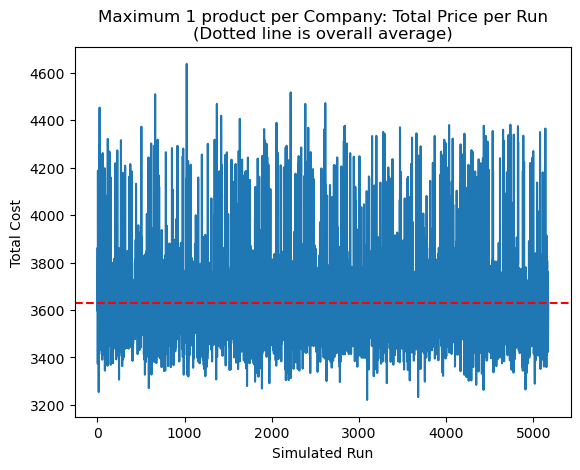

In [117]:
# plotting a line graph using cost per iteration
sns.lineplot(data= cost_per_iteration).set(xlabel = 'Simulated Run', 
                                           ylabel = 'Total Cost', 
                                           title = 'Maximum 1 product per Company: Total Price per Run\n(Dotted line is overall average)')
plt.axhline(y=overall_average, c='red', ls = '--')

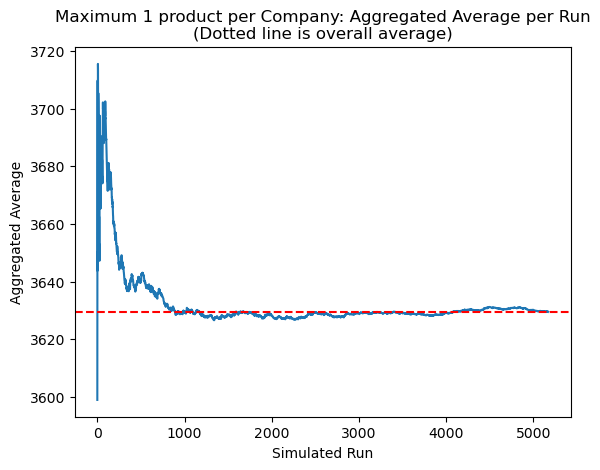

In [118]:
# plotting a line graph using ave per iteration
sns.lineplot(data= ave_per_iteration).set(xlabel = 'Simulated Run',
                                          ylabel = 'Aggregated Average',
                                          title = 'Maximum 1 product per Company: Aggregated Average per Run\n(Dotted line is overall average)')
plt.axhline(y=overall_average, c='red', ls = '--')

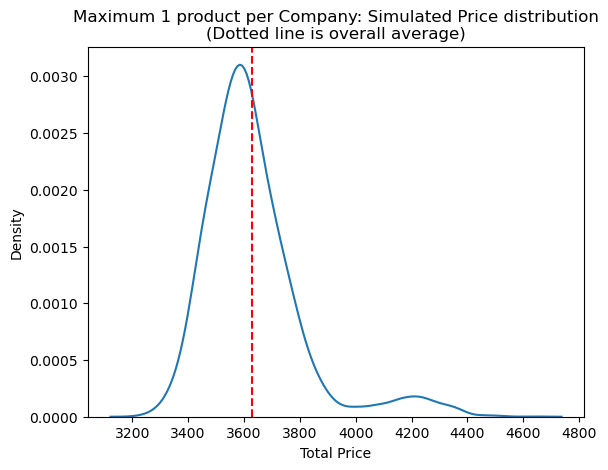

In [119]:
# plotting a line graph using cost per iteration
sns.kdeplot(data= cost_per_iteration).set(xlabel = 'Total Price',  
                                           title = 'Maximum 1 product per Company: Simulated Price distribution\n(Dotted line is overall average)')
plt.axvline(x=overall_average, c='red', ls = '--')

In [120]:
n_1_min_list = min_list_of_product
n_1_max_list = max_list_of_product
n_1_avg_list = ave_list_of_product

In [121]:
#initialize empty list
n = 2
current_run = 0
overall_average = 0

cost_per_iteration = []
ave_per_iteration = []

ave_list_of_product = []
min_list_of_product = []
max_list_of_product =[]

# If we pick 1 product from each company
# there are 100 company that only carry 1 product, this will be our base case
#while (overall_average*.995 > current_cost) or (current_cost < overall_average*1.005):
while current_run < 10000:
# Algorithim to select product and calculate total cost
    list_of_product_to_to_purchase = []
    current_cost = 0
    current_run += 1
    for company in purchase_dataframe['Company'].unique():
        product_entries = purchase_dataframe[purchase_dataframe['Company'] == company]
        # randomly select n product
        if len(product_entries) > n:
            selected_entries = random.sample(product_entries.index.tolist(), n)
        # else pick the everything on the list
        else:
            selected_entries = product_entries.index.tolist()
        # append to product list
        for selected_entry in selected_entries:
            list_of_product_to_to_purchase.append(purchase_dataframe.loc[selected_entry, 'index'])
            # calculate total cost, and append total cost to list
            current_cost += purchase_dataframe.loc[selected_entry, 'Price']
    # append total to a list
    cost_per_iteration.append(current_cost)
    # add list of product to min list if it is the lowest price in current cost
    if current_cost <= min(cost_per_iteration):
        min_list_of_product = list_of_product_to_to_purchase
    # add list of product to max list if it is the highest price in the current cost
    if current_cost >= max(cost_per_iteration):
        max_list_of_product = list_of_product_to_to_purchase

    overall_average = sum(cost_per_iteration)/len(cost_per_iteration)
    ave_per_iteration.append(overall_average)

    # stop the loop if price is within 99.9% overall average
    if current_run > 5000:
        if(current_cost <= overall_average*1.001) and (current_cost >= overall_average*.999):
            ave_list_of_product = list_of_product_to_to_purchase
            break

print(f'Total Run: {current_run} \nOverall Average Cost {current_cost}')
print(f'Minimum Cost: {min(cost_per_iteration)}\nMaximum Cost: {max(cost_per_iteration)}')

Total Run: 5120 
Overall Average Cost 5431.749999999981
Minimum Cost: 4902.519999999983
Maximum Cost: 6637.699999999981


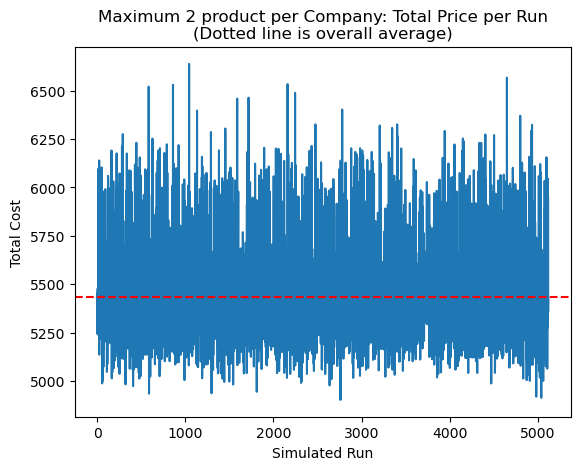

In [122]:
# plotting a line graph using cost per iteration
sns.lineplot(data= cost_per_iteration).set(xlabel = 'Simulated Run', 
                                           ylabel = 'Total Cost', 
                                           title = 'Maximum 2 product per Company: Total Price per Run\n(Dotted line is overall average)')
plt.axhline(y=overall_average, c='red', ls = '--')

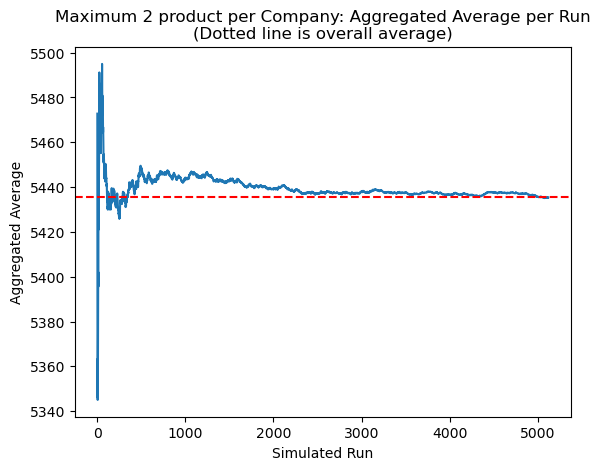

In [123]:
# plotting a line graph using ave per iteration
sns.lineplot(data= ave_per_iteration).set(xlabel = 'Simulated Run',
                                          ylabel = 'Aggregated Average',
                                          title = 'Maximum 2 product per Company: Aggregated Average per Run\n(Dotted line is overall average)')
plt.axhline(y=overall_average, c='red', ls = '--')

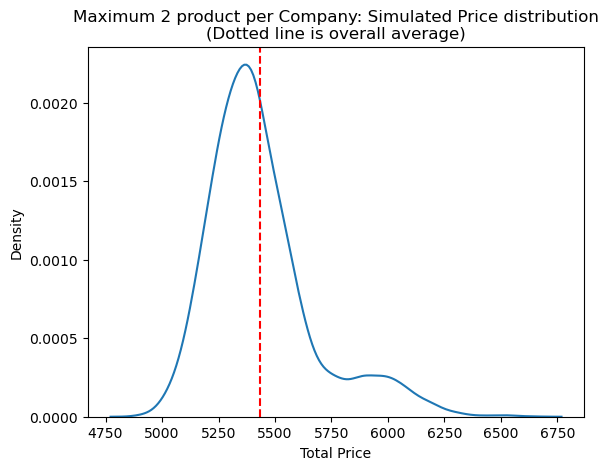

In [124]:
# plotting a line graph using cost per iteration
sns.kdeplot(data= cost_per_iteration).set(xlabel = 'Total Price',  
                                           title = 'Maximum 2 product per Company: Simulated Price distribution\n(Dotted line is overall average)')
plt.axvline(x=overall_average, c='red', ls = '--')

In [111]:
n_2_min_list = min_list_of_product
n_2_max_list = max_list_of_product
n_2_avg_list = ave_list_of_product

In [ ]:
#We want to find out :

#how many product we want to buy, and cost associated with that, we want to find out the actual product.
#ranking matrix